In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns   

import warnings 
warnings.simplefilter('ignore')

In [2]:
df=pd.read_csv("C:\\Users\\debad\\Downloads\\Fraud.csv")
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [4]:
#In the given dataset , all the datatypes are in the proper format. 

In [5]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [6]:
#there is no null values.

In [7]:
df["type"].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

In [8]:
df.drop(columns=["step","nameOrig","nameDest"],inplace=True)
df.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,0
1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,0
2,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,0
3,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,0
4,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,0


In [9]:
#I don't need these features as these features are not required for the given dataset.

<Axes: >

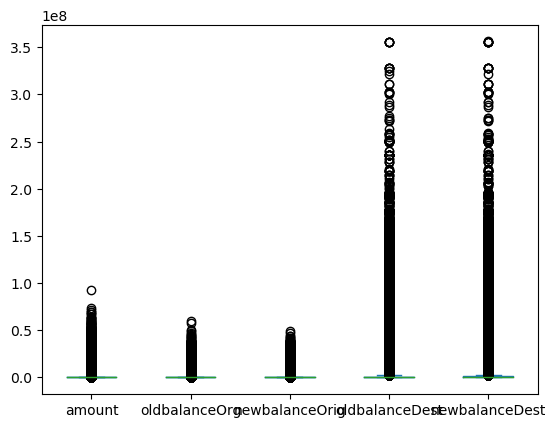

In [10]:
df[["amount","oldbalanceOrg","newbalanceOrig","oldbalanceDest","newbalanceDest"]].plot(kind="box")


In [11]:
#as there are some outliers . I retrained the outlier.

In [12]:
#in the dataset there are some skewed data.so I converted these skewed data to normal data by applying box-cox method.

In [13]:
from scipy import stats

print(df["amount"].skew())
df["box_amount"],param=stats.boxcox(df.amount+0.01)
print(df["box_amount"].skew())

print(df["oldbalanceOrg"].skew())
df["box_oldbalanceOrg"],param=stats.boxcox(df.oldbalanceOrg+0.01)
print(df["box_oldbalanceOrg"].skew())

print(df["newbalanceOrig"].skew())
df["box_newbalanceOrig"],param=stats.boxcox(df.newbalanceOrig+0.01)
print(df["box_newbalanceOrig"].skew())

print(df["oldbalanceDest"].skew())
df["box_oldbalanceDest"],param=stats.boxcox(df.oldbalanceDest+0.01)
print(df["box_oldbalanceDest"].skew())

print(df["newbalanceDest"].skew())
df["box_newbalanceDest"],param=stats.boxcox(df.newbalanceDest+0.01)
print(df["box_newbalanceDest"].skew())

30.99394948249038
-0.01897116882745448
5.249136420603121
-0.2040328105478424
5.176884001159233
0.3077416938839443
19.921757915791062
-0.21127780463803456
19.352302057660165
-0.34336454885234335


In [14]:
df.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,box_amount,box_oldbalanceOrg,box_newbalanceOrig,box_oldbalanceDest,box_newbalanceDest
0,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,0,16.100764,16.813203,8.782110,-4.236069,-4.014057
1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,0,11.839701,13.099428,7.621837,-4.236069,-4.014057
2,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,0,7.060007,5.979102,-5.239437,-4.236069,-4.014057
3,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,0,7.060007,5.979102,-5.239437,12.031806,-4.014057
4,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,0,16.584003,14.252640,7.870681,-4.236069,-4.014057


In [15]:
#I gave the feature name according to my understanding after transformation.I took only these features as these features contained normal data.

df1=df[["type","box_amount","box_oldbalanceOrg","box_newbalanceOrig","box_oldbalanceDest","box_newbalanceDest","isFraud","isFlaggedFraud"]]
df1.head()

,type,box_amount,box_oldbalanceOrg,box_newbalanceOrig,box_oldbalanceDest,box_newbalanceDest,isFraud,isFlaggedFraud
0,PAYMENT,16.100764,16.813203,8.782110,-4.236069,-4.014057,0,0
1,PAYMENT,11.839701,13.099428,7.621837,-4.236069,-4.014057,0,0
2,TRANSFER,7.060007,5.979102,-5.239437,-4.236069,-4.014057,1,0
3,CASH_OUT,7.060007,5.979102,-5.239437,12.031806,-4.014057,1,0
4,PAYMENT,16.584003,14.252640,7.870681,-4.236069,-4.014057,0,0


In [16]:
#as I have categorical data in 'type' features , I encoded it . Then dropped the original 'type'.

In [17]:
#encoding type
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df1["type_l"]=le.fit_transform(df1[["type"]])
df1.drop(columns=["type"],inplace=True)
df1.head()

,box_amount,box_oldbalanceOrg,box_newbalanceOrig,box_oldbalanceDest,box_newbalanceDest,isFraud,isFlaggedFraud,type_l
0,16.100764,16.813203,8.782110,-4.236069,-4.014057,0,0,3
1,11.839701,13.099428,7.621837,-4.236069,-4.014057,0,0,3
2,7.060007,5.979102,-5.239437,-4.236069,-4.014057,1,0,4
3,7.060007,5.979102,-5.239437,12.031806,-4.014057,1,0,1
4,16.584003,14.252640,7.870681,-4.236069,-4.014057,0,0,3


In [18]:
#I check the correalation between the independent features
df1.corr()


#and yes there is multicollenearity problem . so I go through VIF to check the features which have maximum VIF

,box_amount,box_oldbalanceOrg,box_newbalanceOrig,box_oldbalanceDest,box_newbalanceDest,isFraud,isFlaggedFraud,type_l
box_amount,1.000000,0.037840,-0.166642,0.610713,0.688687,0.048431,0.004646,-0.339704
box_oldbalanceOrg,0.037840,1.000000,0.742344,0.018322,0.029077,0.034589,0.002333,-0.326666
box_newbalanceOrig,-0.166642,0.742344,1.000000,-0.030021,-0.157202,-0.029650,0.002127,-0.321533
box_oldbalanceDest,0.610713,0.018322,-0.030021,1.000000,0.881880,-0.017257,-0.001815,-0.545224
box_newbalanceDest,0.688687,0.029077,-0.157202,0.881880,1.000000,-0.007412,-0.001965,-0.506874
isFraud,0.048431,0.034589,-0.029650,-0.017257,-0.007412,1.000000,0.044109,0.020833
isFlaggedFraud,0.004646,0.002333,0.002127,-0.001815,-0.001965,0.044109,1.000000,0.002685
type_l,-0.339704,-0.326666,-0.321533,-0.545224,-0.506874,0.020833,0.002685,1.000000


In [19]:
#checking vif
import statsmodels.formula.api as smf
rsq_box_newbalanceOrig = smf.ols('box_newbalanceOrig~box_oldbalanceOrg+	box_oldbalanceDest+box_newbalanceDest+box_amount',data=df).fit().rsquared
vif_box_newbalanceOrig= 1/(1-rsq_box_newbalanceOrig)

rsq_box_oldbalanceOrg = smf.ols('box_oldbalanceOrg~box_newbalanceOrig+box_oldbalanceDest+box_newbalanceDest+box_amount',data=df).fit().rsquared
vif_box_oldbalanceOrg=1/(1-rsq_box_oldbalanceOrg)

rsq_box_oldbalanceDest= smf.ols('box_oldbalanceDest~box_newbalanceOrig+box_oldbalanceOrg+box_newbalanceDest+box_amount',data=df).fit().rsquared
vif_box_oldbalanceDest=1/(1-rsq_box_oldbalanceDest)

rsq_box_newbalanceDest=smf.ols('box_newbalanceDest~box_newbalanceOrig+box_oldbalanceDest+box_oldbalanceDest+box_amount',data=df).fit().rsquared
vif_box_newbalanceDest=1/(1-rsq_box_newbalanceDest)

rsq_box_amount=smf.ols('box_amount~box_newbalanceOrig+box_oldbalanceDest+box_newbalanceDest+box_newbalanceDest',data=df).fit().rsquared
vif_box_amount=1/(1-rsq_box_amount)

vif_frame=pd.DataFrame({'variables':['newbalanceOrig','oldbalanceOrg','oldbalanceDest','newbalanceDest','amount'],'vif':[vif_box_newbalanceOrig,vif_box_oldbalanceOrg,vif_box_oldbalanceDest,vif_box_newbalanceDest,vif_box_amount]})
vif_frame

,variables,vif
0,newbalanceOrig,2.872853
1,oldbalanceOrg,2.634177
2,oldbalanceDest,5.263859
3,newbalanceDest,5.651484
4,amount,1.916620


In [20]:
#according to the VIF these features have maximum VIF > 4. So I drop these features.
X=df1.drop(["isFraud","box_newbalanceDest","box_oldbalanceDest"],axis=1)
y=df1["isFraud"]

In [21]:
X

,box_amount,box_oldbalanceOrg,box_newbalanceOrig,isFlaggedFraud,type_l
0,16.100764,16.813203,8.782110,0,3
1,11.839701,13.099428,7.621837,0,3
2,7.060007,5.979102,-5.239437,0,4
3,7.060007,5.979102,-5.239437,0,1
4,16.584003,14.252640,7.870681,0,3
...,...,...,...,...,...
6362615,28.314353,18.140311,-5.239437,0,1
6362616,42.770527,24.314191,-5.239437,0,4
6362617,42.770527,24.314191,-5.239437,0,1
6362618,32.352568,19.977046,-5.239437,0,4


In [22]:
y

0          0
1          0
2          1
3          1
4          0
          ..
6362615    1
6362616    1
6362617    1
6362618    1
6362619    1
Name: isFraud, Length: 6362620, dtype: int64

In [23]:
df['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [24]:
#It is completely contain imbalanced data.Here I applied oversampling and increase the data.

In [25]:
#imbalance dataset
from imblearn.over_sampling import SMOTE
SMOTE=SMOTE()
X_new,y_new = SMOTE.fit_resample(X,y)
y_new.value_counts()

0    6354407
1    6354407
Name: isFraud, dtype: int64

In [26]:
#train Test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=9)

In [27]:
#scaling
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X=ss.fit_transform(X)


In [28]:
#pca:
from sklearn.decomposition import PCA
pca_model=PCA(n_components=0.95)

X_train_pca=pca_model.fit_transform(X_train)
X_test_pca=pca_model.fit_transform(X_test)

In [29]:
pca_model.explained_variance_ratio_

array([0.71203767, 0.20340644, 0.07749088])

In [30]:
X_train_pca.shape

(5090096, 3)

In [31]:
X_train_pca

array([[-14.20800126,  -3.2918747 ,   0.85340555],
       [ 17.91226194,   0.949824  ,   0.43000725],
       [ -3.73243576,   5.1392269 ,  -3.42217339],
       ...,
       [  0.12018674,   7.15756447,  -5.33642527],
       [-14.26189958,  -0.35908159,   1.81526396],
       [-14.24330335,  -5.90501261,  -0.12769475]])

In [32]:
a=pd.DataFrame(X_train_pca)
a

,0,1,2
0,-14.208001,-3.291875,0.853406
1,17.912262,0.949824,0.430007
2,-3.732436,5.139227,-3.422173
3,13.045556,-3.677539,0.568804
4,-14.223903,-6.960672,-0.473916
...,...,...,...
5090091,9.499226,4.567491,5.559863
5090092,-14.327400,3.205023,2.984172
5090093,0.120187,7.157564,-5.336425
5090094,-14.261900,-0.359082,1.815264


In [33]:
a.corr()

,0,1,2
0,1.000000e+00,-4.417005e-16,1.430905e-16
1,-4.417005e-16,1.000000e+00,9.548438e-16
2,1.430905e-16,9.548438e-16,1.000000e+00


# Modelling:

In [34]:
#logistic regression
#modelling
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()
log_reg.fit(X_train_pca,y_train)

#prediction
test_pred=log_reg.predict(X_test_pca)
train_pred=log_reg.predict(X_train_pca)

#accuracy
from sklearn.metrics import accuracy_score
print("test_accuracy:",accuracy_score(y_test,test_pred))
print("train_accuracy:",accuracy_score(y_train,train_pred))

#crossvalidation score:
from sklearn.model_selection import cross_val_score
print("cross_validation_score:",cross_val_score(log_reg,X,y,cv=5).mean())

test_accuracy: 0.9991057143126574
train_accuracy: 0.9991002134340885
cross_validation_score: 0.9990750665606306


In [35]:
#confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,test_pred)

array([[1270858,      17],
       [   1121,     528]], dtype=int64)

In [36]:
#classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270875
           1       0.97      0.32      0.48      1649

    accuracy                           1.00   1272524
   macro avg       0.98      0.66      0.74   1272524
weighted avg       1.00      1.00      1.00   1272524



So this is a good model and I applied both Random Forest and Boosting algorithm also in this dataset . For that case also I got the same accuracy and cv score. So I considered Logistic regression as it took less time than the other algorithm.

In the given dataset if the 'newbalanceorig' is about to '0' after the transaction ,then it recognised the transaction as fraudulent. 
Yes these factors do make sense.In this case, abnormal transaction patterns,unusual transaction amounts can indicate that a customer is attempting to make fraudulent transactions.

When a company updates its infrastructure,it should adopt several prevention measures to prevent fraudulent activity.It should implement multi-factor authentication,improving employee awarness and training. Suggest customer not to make '0' to their account balance .

To determine if these prevention measures are working, the company can monitor several key metrics, including the number of fraudulent transactions detected, the false positive rate of the fraud detection tools, the customer satisfaction rate, and the overall revenue generated. Additionally, the company can conduct regular audits and risk assessments to identify any potential vulnerabilities in the system and to determine the effectiveness of the prevention measures implemented.


In [38]:
#load a model
from joblib import dump
dump(log_reg,'Financial_Fraud_detection.joblib')

['Financial_Fraud_detection.joblib']